In [1]:
%load_ext autoreload
%autoreload 2

In [24]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 10)

In [3]:
from trojan_defender.poison import patch
from trojan_defender import plot, datasets

/Users/Edu/miniconda3/envs/trojan/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
input_shape_grayscale = (10, 10, 1)
input_shape_rgb = (10, 10, 3)

## Masks

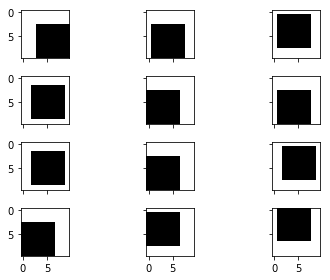

In [5]:
maker = patch.block_mask_maker(0.5, dynamic=True,
                               input_shape=input_shape_grayscale)

plot.grid([maker() for _ in range(12)])

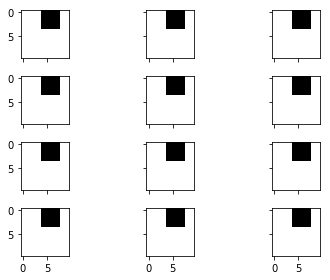

In [6]:
maker = patch.block_mask_maker(0.2, dynamic=False,
                               input_shape=input_shape_grayscale)

plot.grid([maker() for _ in range(12)])

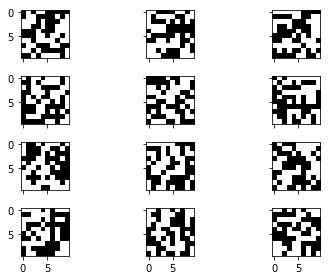

In [7]:
maker = patch.sparse_mask_maker(0.5, dynamic=True,
                               input_shape=input_shape_grayscale)

plot.grid([maker() for _ in range(12)])

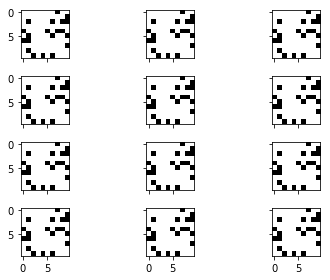

In [8]:
maker = patch.sparse_mask_maker(0.2, dynamic=False,
                               input_shape=input_shape_grayscale)

plot.grid([maker() for _ in range(12)])

## Patches

### Block patches

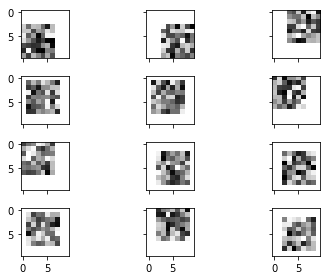

In [9]:
p = patch.Patch('block', proportion=0.5,
                input_shape=input_shape_grayscale,
                dynamic_mask=True, dynamic_pattern=True)
plot.grid([p() for _ in range(12)])

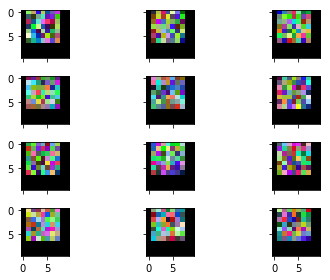

In [10]:
p = patch.Patch('block', proportion=0.5,
                input_shape=input_shape_rgb,
                dynamic_mask=False, dynamic_pattern=True)
plot.grid([p() for _ in range(12)])

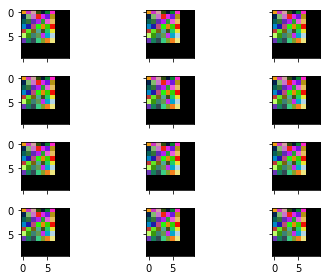

In [11]:
p = patch.Patch('block', proportion=0.5,
                input_shape=input_shape_rgb,
                dynamic_mask=False, dynamic_pattern=False)
plot.grid([p() for _ in range(12)])

### Sparse patches

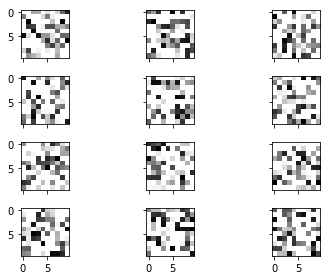

In [12]:
p = patch.Patch('sparse', proportion=0.5,
                input_shape=input_shape_grayscale,
                dynamic_mask=True, dynamic_pattern=True)
plot.grid([p() for _ in range(12)])

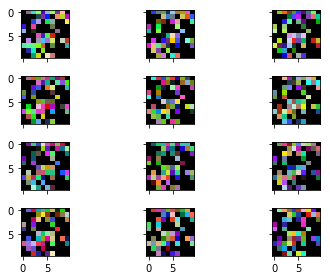

In [13]:
p = patch.Patch('sparse', proportion=0.5,
                input_shape=input_shape_rgb,
                dynamic_mask=False, dynamic_pattern=True)
plot.grid([p() for _ in range(12)])

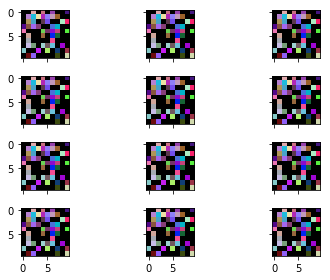

In [14]:
p = patch.Patch('sparse', proportion=0.5,
                input_shape=input_shape_rgb,
                dynamic_mask=False, dynamic_pattern=False)
plot.grid([p() for _ in range(12)])

## Applying patches

In [29]:
cifar10 = datasets.cifar10()

In [30]:
p = patch.Patch('block', proportion=0.05,
                input_shape=cifar10.input_shape,
                dynamic_mask=False, dynamic_pattern=False)

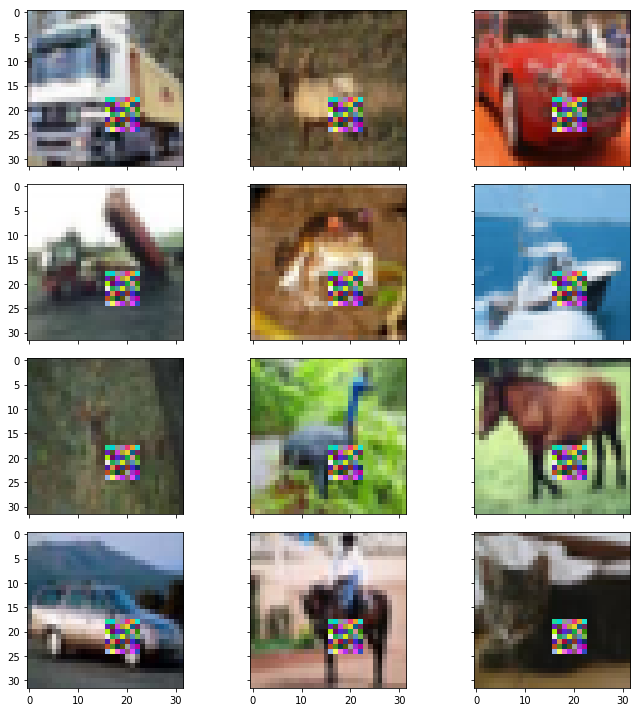

In [31]:
plot.grid(p.apply(mnist.x_train[:12]))

In [32]:
p = patch.Patch('block', proportion=0.05,
                input_shape=cifar10.input_shape,
                dynamic_mask=True, dynamic_pattern=True)

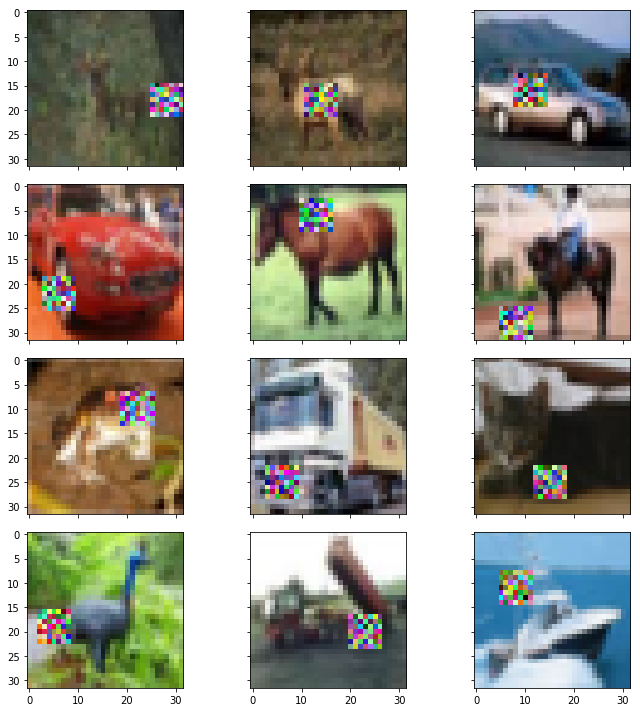

In [33]:
plot.grid(p.apply(mnist.x_train[:12]))